1.Perform EDA on the provided dataset.
For this task, we are given three datasets:

Customers.csv: Contains information about customers.
Products.csv: Contains information about products.
Transactions.csv: Contains transaction records.
We will perform the following steps:

Load and Inspect the Data.
Clean the Data (e.g., handle missing values, duplicates, correct data types).
Visualize the Data (distribution, relationships, trends).
Summarize Key Findings from the analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
customers = pd.read_csv('/content/drive/MyDrive/ZEOTAP /Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/ZEOTAP /Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/ZEOTAP /Transactions.csv')

# Inspect the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check the datatypes
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

1.2. Data Cleaning
Check for missing values and remove or impute them.
Correct data types for date columns (e.g., SignupDate and TransactionDate).
Remove duplicates if any.

In [2]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Remove duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


1.3. Exploratory Data Analysis (EDA)
Customer Demographics
Customer Distribution by Region: Visualize the distribution of customers across regions.


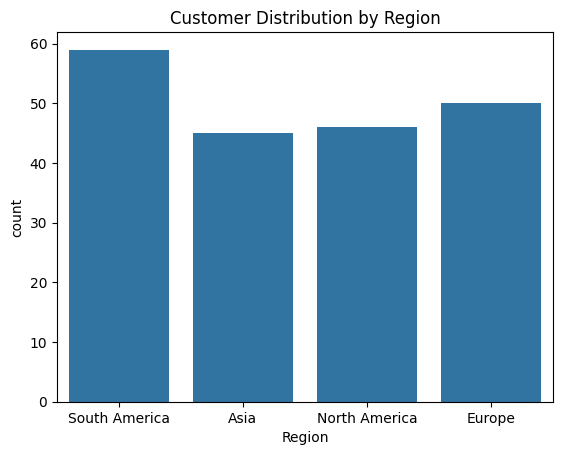

In [3]:
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show()


Product Analysis
Product Category Distribution: Visualize the product categories.


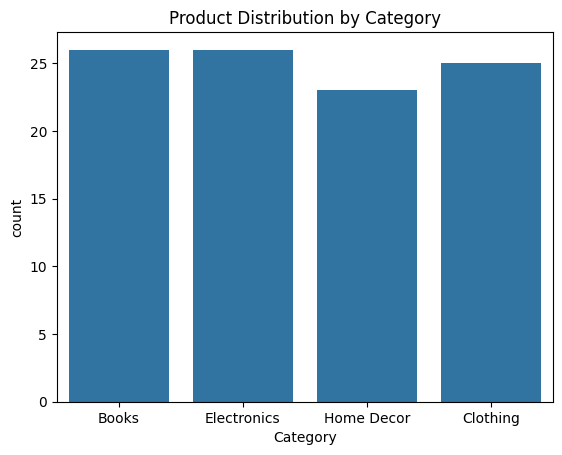

In [4]:
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.show()


Price Distribution: Visualize the price distribution of products.

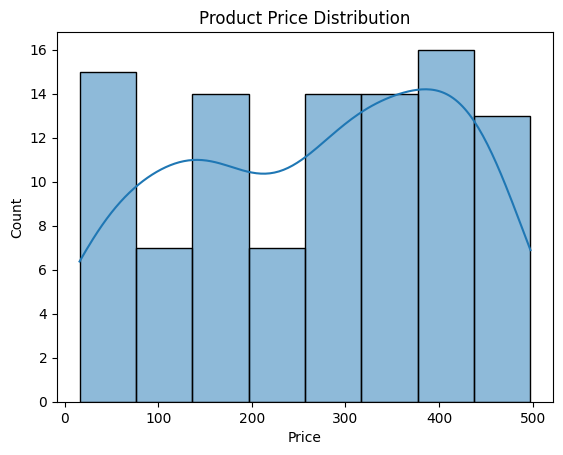

In [5]:
sns.histplot(products['Price'], kde=True)
plt.title('Product Price Distribution')
plt.show()


Transaction Analysis
Total Sales Over Time: Visualize total sales by month to check for trends.

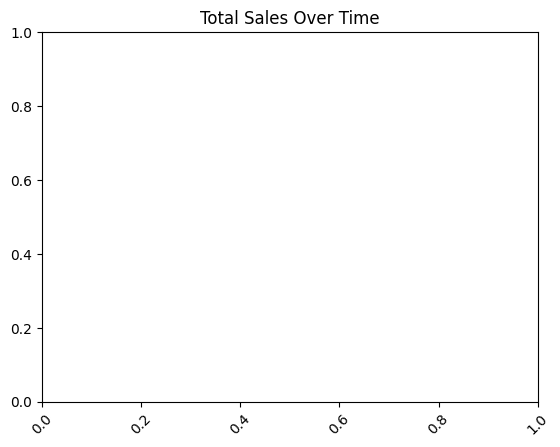

In [7]:
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transactions_grouped = transactions.groupby('YearMonth').agg({'TotalValue': 'sum'}).reset_index()
#sns.lineplot(data=transactions_grouped, x='YearMonth', y='TotalValue')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.show()


Top Selling Products: Visualize the products with the highest total sales.

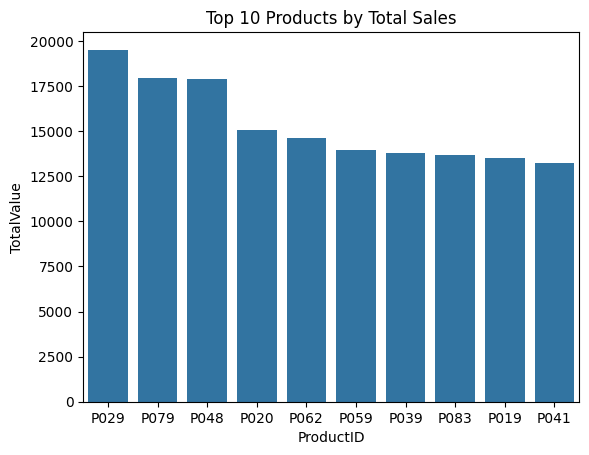

In [8]:
product_sales = transactions.groupby('ProductID').agg({'TotalValue': 'sum'}).reset_index()
top_products = product_sales.sort_values(by='TotalValue', ascending=False).head(10)
sns.barplot(data=top_products, x='ProductID', y='TotalValue')
plt.title('Top 10 Products by Total Sales')
plt.show()


Customer Spending: Visualize the distribution of total spending by each customer.

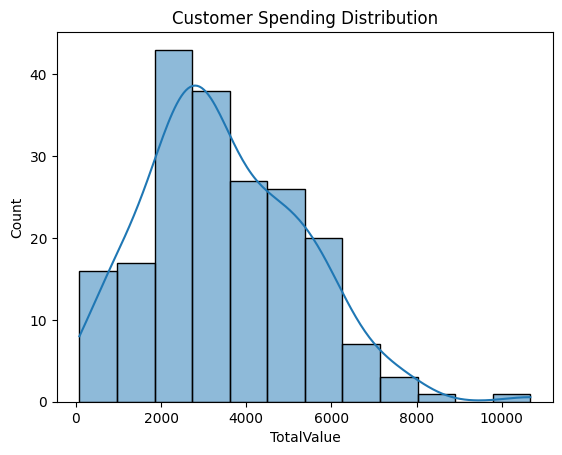

In [9]:
customer_spending = transactions.groupby('CustomerID').agg({'TotalValue': 'sum'}).reset_index()
sns.histplot(customer_spending['TotalValue'], kde=True)
plt.title('Customer Spending Distribution')
plt.show()
